# 変数変換による確率密度関数の変化

連続型確率変数$X$の確率密度関数を$f(x)$とする。  
ここで新たな確率変数$Y=g(X)$の確率密度関数について考える。  
このとき、$Y$の確率密度関数は$f(g^{-1}(y))/|g'(g^{-1}(y))|$として与えられる。  
つまり$f(x)/|g'(x)|$の$x$を$y$に変換したものとして与えられる。

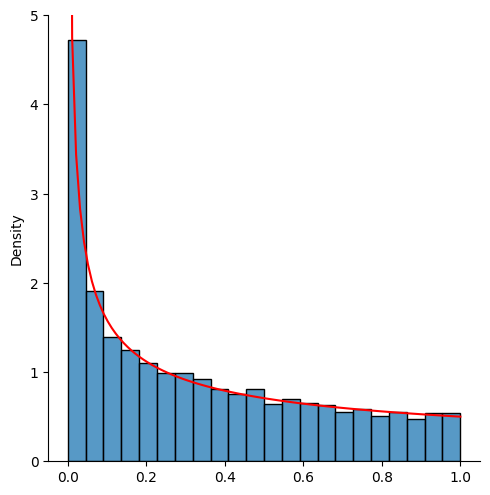

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fX(x) = 1(0<=x<=1), 0(otherwise)で
# Y=X**2が従う確率密度関数fYを考えてみる
x = np.random.rand(10000)
y = x**2
sns.displot(y, kde=False, stat='density')

# X=g**-1(Y)=Y**(1/2)となる
# fY(y) = fX(y**(1/2))*|g'(y**(1/2))| = 1*|1/2*y**(-1/2)| = 1/(2*√y)
x2 = np.linspace(0.001, 1, 100)
y2 = 1 / (2*np.sqrt(x2))
plt.plot(x2, y2, color='red')
plt.ylim(0, 5)
plt.show()

つづいて、2変数$(X,Y)$の確率密度関数を$f(x,y)$とし、変数変換$(Z,W) = (u(X,Y), v(X,Y))$について考える。  
ただし、1対1の変換とし、逆変換$(X,Y) = (s(Z,W), t(Z,W))$が存在するものとする。この変換のヤコビアンは、
$$
J(X,Y) = \frac{\partial(u(X,Y),v(X,Y))}{\partial(X,Y)}
$$
と計算される。  
このとき$(Z,W)$の確率密度関数は$f(s(z,w),t(z,w))/|J(s(z,w),t(z,w))|$として与えられる。

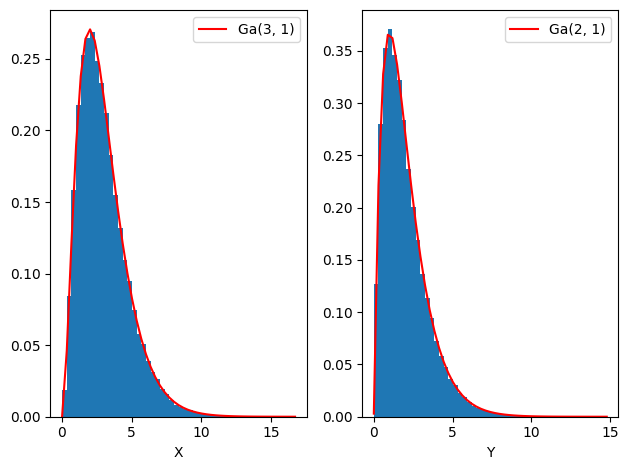

In [2]:
# ガンマ分布に従うX Yについて、S=X+Y, T=X/(X+Y)という変数変換を実行してみる
import scipy.special as sps

a = 3
b = 2
scale = 1
X = np.linspace(0, 20, 1000)
Y = np.linspace(0, 20, 1000)

# 乱数生成
x = np.random.gamma(a, 1, 100_000)
y = np.random.gamma(b, 1, 100_000)

fig, (ax1, ax2) = plt.subplots(1, 2)

count, bins, ignored = ax1.hist(x, bins=50, density=True)
x_pdf = bins**(a-1)*(np.exp(-bins/scale)/(sps.gamma(a)*scale**a))
ax1.plot(bins, x_pdf, label=f"Ga({a}, 1)", c="r")

count, bins, ignored = ax2.hist(y, bins=50, density=True)
y_pdf = bins**(b-1)*(np.exp(-bins/scale)/(sps.gamma(b)*scale**b))
ax2.plot(bins, y_pdf, label=f"Ga({b}, 1)", c="r")

ax1.set_xlabel("X")
ax2.set_xlabel("Y")
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

こちらは変換前のガンマ関数のプロット

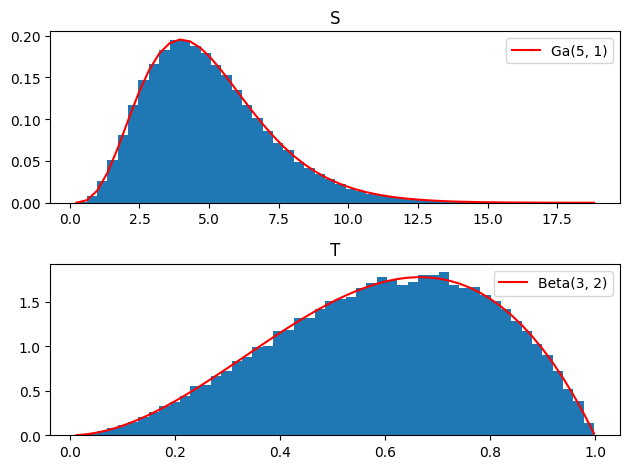

In [3]:
S = np.linspace(0, 20, 1000)
T = np.linspace(0, 20, 1000)

# 変数変換 Ga(5,1),Beta(3,2)に変換する
s = x + y
t = x / (x + y)

fig, (ax1, ax2) = plt.subplots(2, 1)

count, bins, ignored = ax1.hist(s, bins=50, density=True)
s_shape = a+b
s_pdf = bins**(s_shape-1)*(np.exp(-bins/scale)/(sps.gamma(s_shape)*scale**(s_shape)))
ax1.plot(bins, s_pdf, label=f"Ga({a + b}, 1)", color="r")

from scipy.stats import beta
count, bins, ignored = ax2.hist(t, bins=50, density=True)
t_val = beta(a, b)
t_pdf = t_val.pdf(bins)
ax2.plot(bins, t_pdf, label=f"Beta({a}, {b})", color="r")

ax1.set_title("S")
ax2.set_title("T")
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show() # Ga(5,1),Beta(3,2)に従う

変換後のガンマ関数とベータ関数をプロットすると上のようになる。

# データの変換

得られたデータを変換することで、さまざまな計算が可能になることがある。  
積が積み重なることにより得られるデータは対数を取ると正規分布に従う。  
このような変換は対数変換と呼ばれる。人口、株価、所得のデータなどで用いられる。

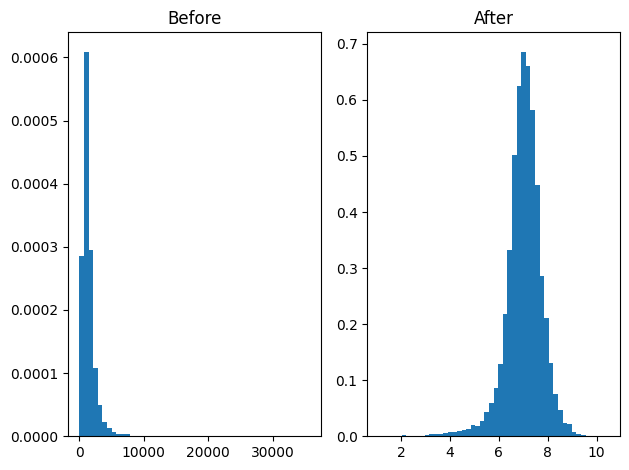

In [4]:
# 対数変換を実践
import pandas as pd

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
ch_df = pd.DataFrame(
    np.c_[data.data, data.target], 
    columns=data.feature_names + ["target"])

fig, (ax1, ax2) = plt.subplots(1, 2)

# 対数変換前
ax1.hist(ch_df["Population"], bins=50, density=True)

# 対数変換後
data_log = np.log(ch_df["Population"])
ax2.hist(data_log, bins=50, density=True)

ax1.set_title("Before")
ax2.set_title("After")

plt.tight_layout()
plt.show()

データを正規分布に従わせる方法としては、**べき乗変換**もある。  
べき乗変換と対数変換をひとまとめにした変換として**Box-Cox変換**がある。  
これはパラメータλに対して
$$
\begin{cases}
\frac{x^{\lambda}-1}{\lambda} \quad (\lambda \neq 0) \\
\log x \quad (\lambda = 0)
\end{cases}
$$
とする変換である。非負のデータしが変換できない点で注意が必要である。

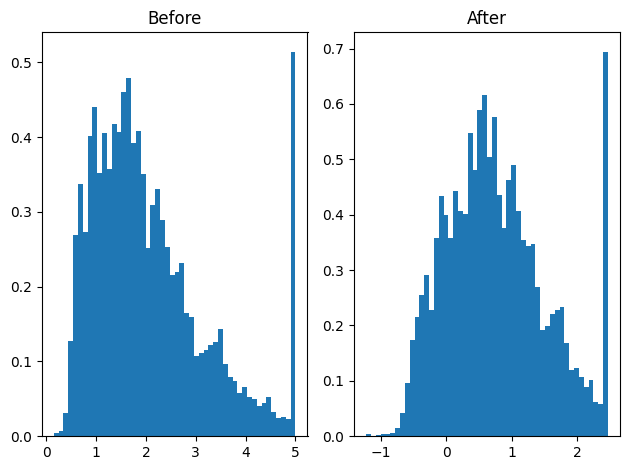

In [5]:
# Box-Cox変換を実践
from scipy.stats import boxcox

fig, (ax1, ax2) = plt.subplots(1, 2)

# Box-Cox変換前
ax1.hist(ch_df["target"], bins=50, density=True)

# Box-Cox変換後
data_boxcox = boxcox(ch_df["target"], lmbda=0.5)
ax2.hist(data_boxcox, bins=50, density=True)

ax1.set_title("Before")
ax2.set_title("After")

plt.tight_layout()
plt.show()

そのほか、確率$p$のように0〜1の値しか取らないデータを$-\infty \sim \infty$に変換するロジット変換、プロビット変換などがあるが、詳細は「18_質的回帰」を参照のこと